In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv('C:\\Users\\Manikanta Marreddy\\Desktop\\Avishkar\\Rain-Prediction-main\\weatherAUS.csv')
pd.set_option('display.max_columns', None)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.isnull().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [5]:
numerical_features = [features for features in data.columns if data[features].dtypes != 'O']
print('Numerical features \n{}'.format(numerical_features))
categorical_features = [features for features in data.columns if features not in numerical_features]
print('Categorical features\n {}'.format(categorical_features))

discret_features = [features for features in numerical_features if len(data[features].unique()) <25]
print('Discret features\n {}'.format(discret_features))

continuous_features = [features for features in numerical_features if features not in discret_features]
print('Continuous Features \n{}'.format(continuous_features))

Numerical features 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical features
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Discret features
 ['Cloud9am', 'Cloud3pm']
Continuous Features 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


# dividing features using for loop
features = []
for features in data.columns:
    if data[features].dtypes != 'O':
        num_features = features
        print('numerical features {}'.format(num_features))
        if len(data[features].unique())>=25:
            disc_features = features
            print(disc_features)
        else:
            cont_features = features
            print(cont_features)

    else:
        print(features)

In [6]:
# Random Sample Imputation method to handle missing values in the dataset
# for refernce visit (link:- https://www.numpyninja.com/post/feature-engineering-handling-missing-data-with-python)
def rand_sample_imputation(data,fields):
    data[fields] = data[fields]
    random_sample = data[fields].dropna().sample(data[fields].isnull().sum(),random_state = 0)
    random_sample.index = data[data[fields].isnull()].index
    data.loc[data[fields].isnull(),fields]=random_sample

In [7]:
rand_sample_imputation(data,'Evaporation')
rand_sample_imputation(data,'Sunshine')
rand_sample_imputation(data,'Cloud9am')
rand_sample_imputation(data,'Cloud3pm')

In [8]:
data
data.isnull().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

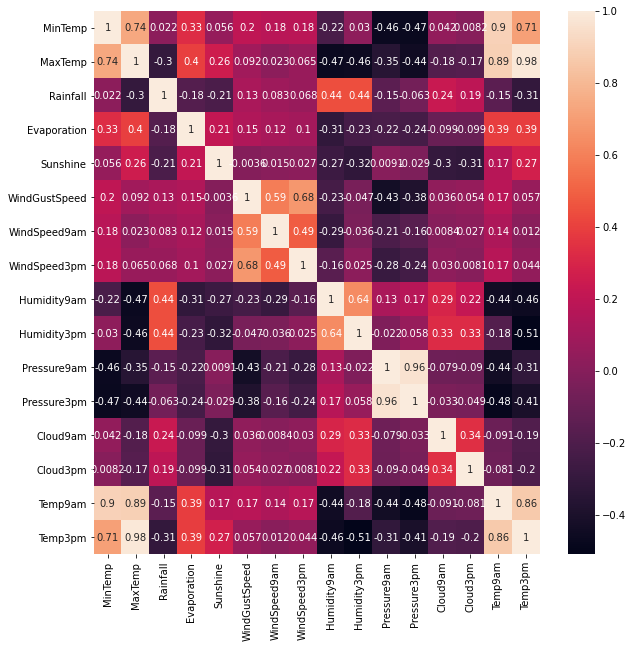

In [9]:
#for spearman refer (link:- https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php)
cor = data.corr(method='spearman')
plt.figure(figsize=(10,10))
heat = sns.heatmap(cor, annot = True)

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


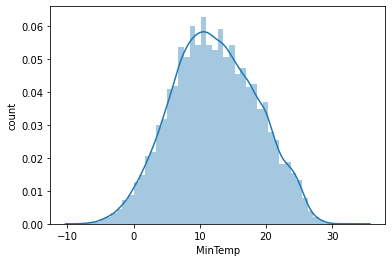

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


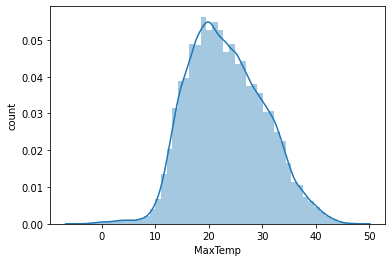

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


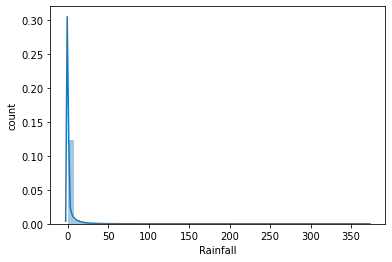

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


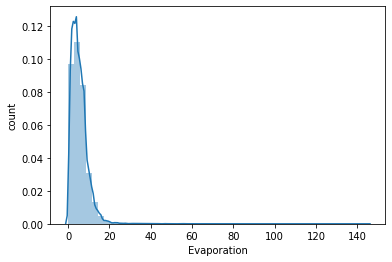

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


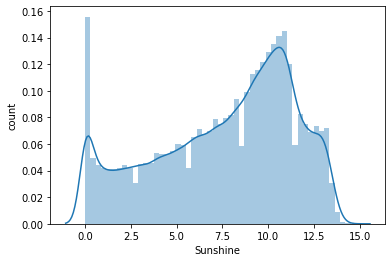

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


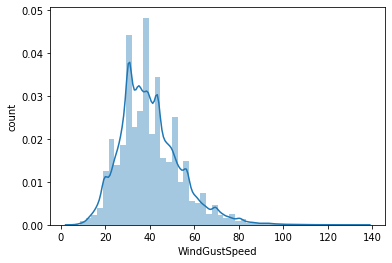

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


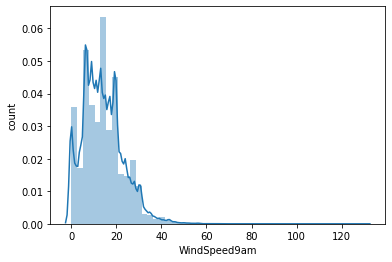

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


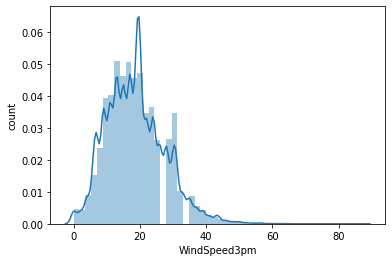

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


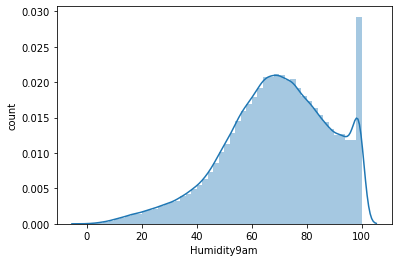

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


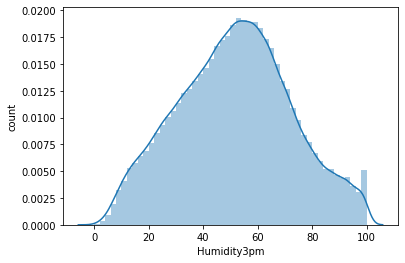

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


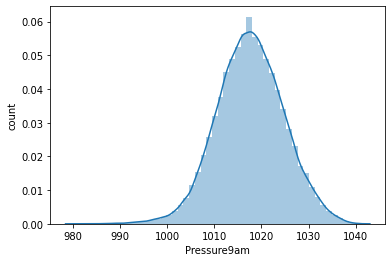

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


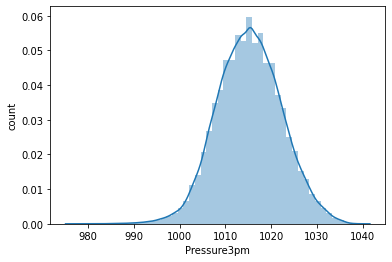

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


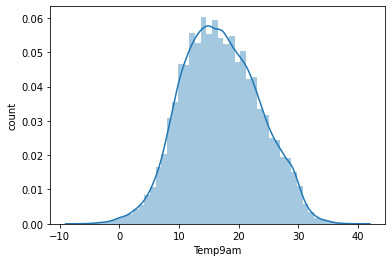

<Figure size 144x144 with 0 Axes>

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


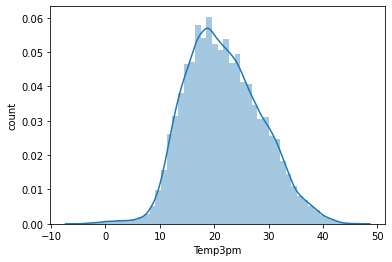

<Figure size 144x144 with 0 Axes>

In [10]:
for feature in continuous_features:

    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.figure(figsize=(2,2))
    plt.show()

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


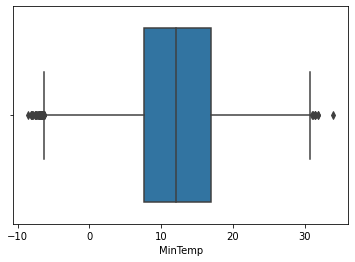

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


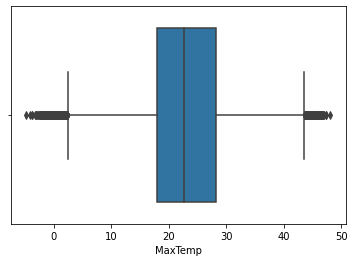

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


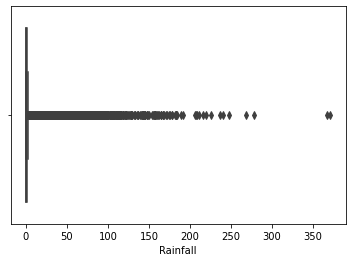

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


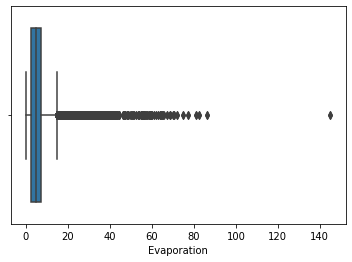

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


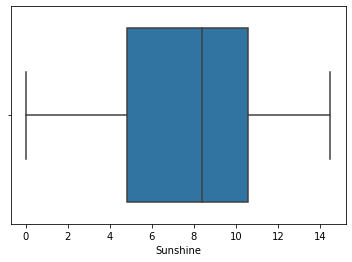

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


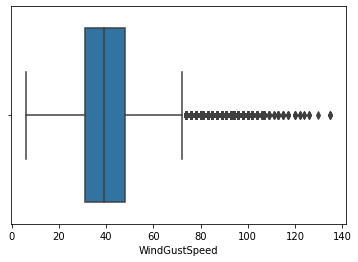

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


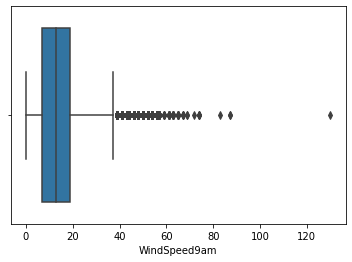

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


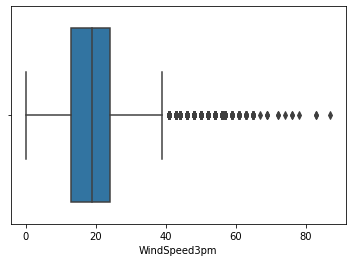

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


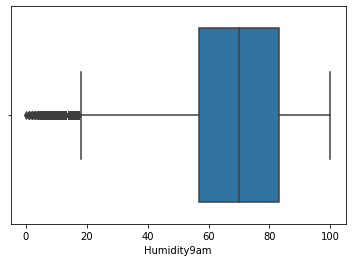

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


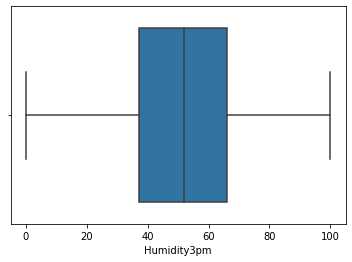

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


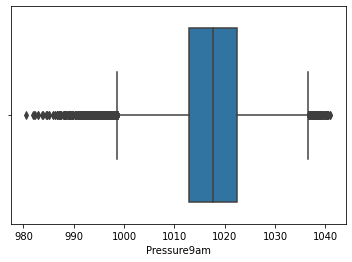

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


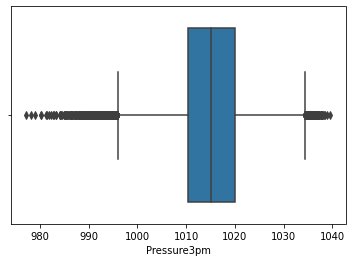

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


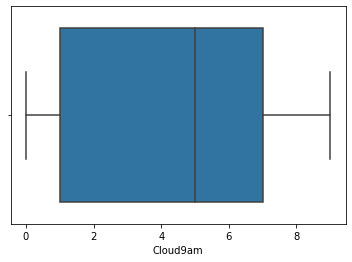

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


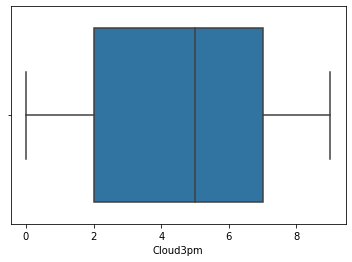

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


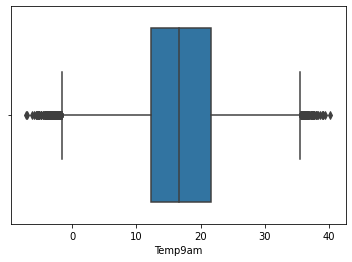

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


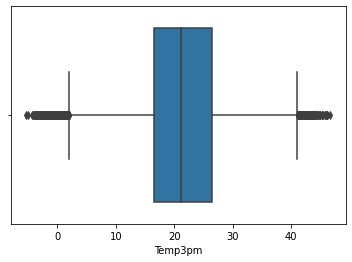

In [11]:
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.show()

In [12]:
for feature in numerical_features:
    if data[feature].isnull().sum()*100/len(data) > 0:
        data[feature] = data[feature].fillna(data[feature].median())

In [13]:
data.isnull().sum()*100/len(data)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [14]:
for feature in categorical_features:
    if data[feature].isnull().sum()*100/len(data)>0:
        data[feature] = data[feature].fillna(data[feature].value_counts().index[0])


In [15]:
data.isnull().sum()*100/len(data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [16]:
data['RainToday'] = pd.get_dummies(data['RainToday'], drop_first= True)
data['RainTomorrow'] = pd.get_dummies(data['RainTomorrow'], drop_first= True)
data[['RainToday','RainTomorrow']]

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [17]:
print(data['RainToday'].value_counts()*100/len(data))
print(data['RainTomorrow'].value_counts()*100/len(data))

0    78.083322
1    21.916678
Name: RainToday, dtype: float64
0    78.085384
1    21.914616
Name: RainTomorrow, dtype: float64


In [18]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
data['WindGustDir'] = data['WindGustDir'].map(windgustdir)
data['WindDir9am'] = data['WindDir9am'].map(winddir9am)
data['WindDir3pm'] = data['WindDir3pm'].map(winddir3pm)

In [19]:
data[['WindGustDir','WindDir9am','WindDir3pm']].head()

,WindGustDir,WindDir9am,WindDir3pm
0,4,5,3
1,2,0,6
2,5,5,6
3,11,13,14
4,4,12,0


In [20]:
data_loc = data.groupby('Location')['RainTomorrow'].value_counts().sort_values().unstack()
data_loc

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [21]:
data_loc[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [22]:
data_loc[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [23]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
data["Location"] = data["Location"].map(location)

In [24]:
data['Location'].head()

0    30
1    30
2    30
3    30
4    30
Name: Location, dtype: int64

In [25]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data['Date_month'] = data['Date'].dt.month
data['Date_day'] = data['Date'].dt.day

In [26]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


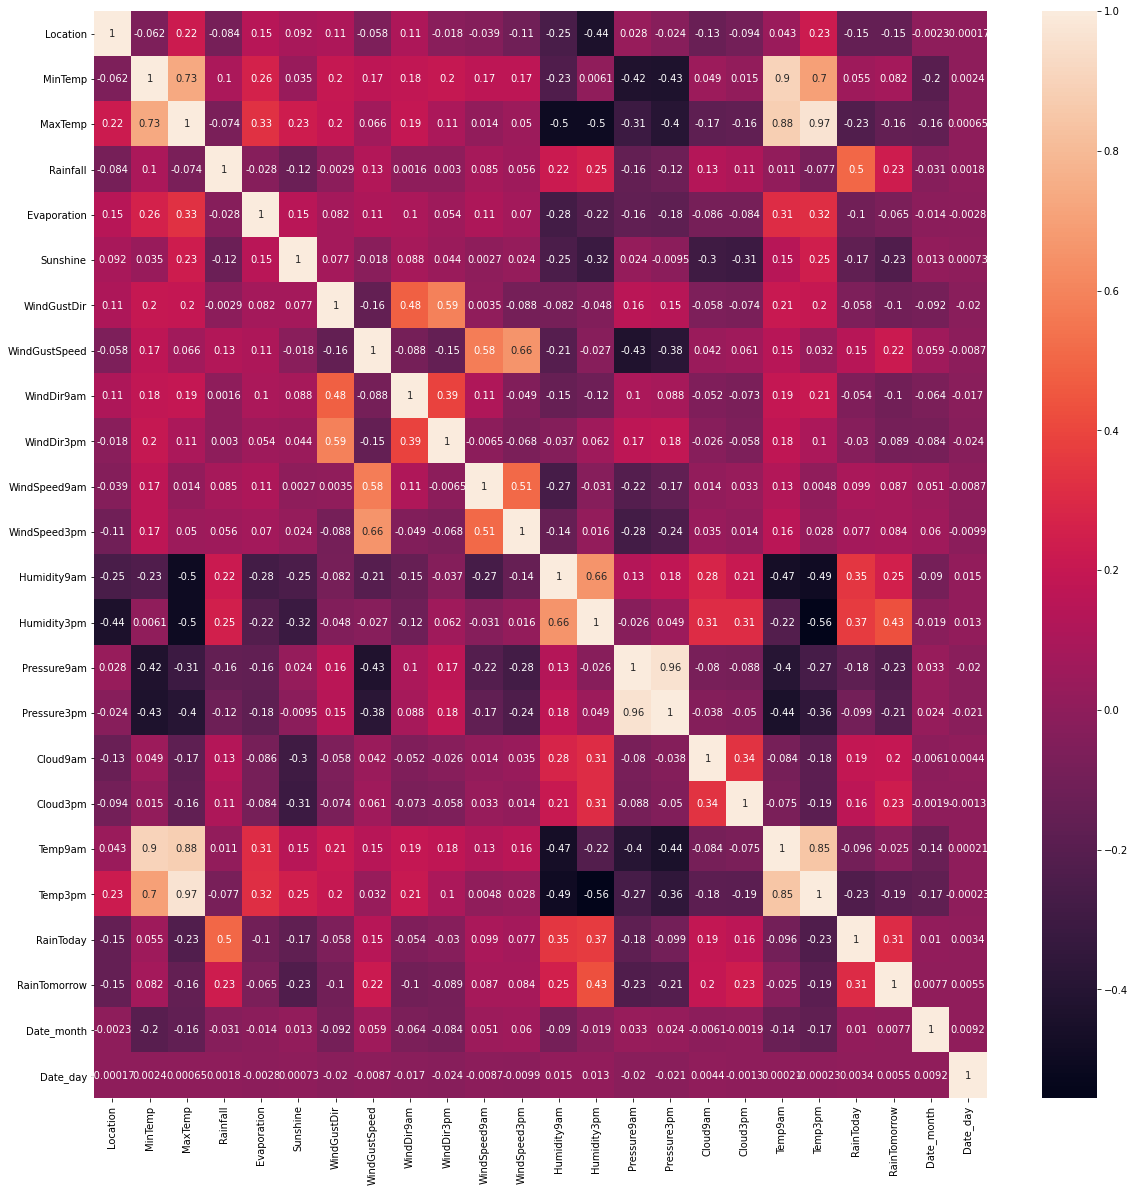

In [27]:
correlate = data.corr()   # refer this link:- https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
plt.figure(figsize=(20,20))
g = sns.heatmap(correlate,annot= True)



0    113583
1     31877
Name: RainTomorrow, dtype: int64


C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


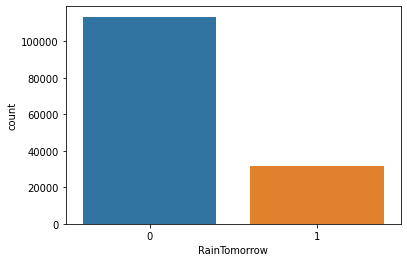

In [28]:
sns.countplot(data['RainTomorrow'])
print(data['RainTomorrow'].value_counts())

In [29]:
data = data.drop(['Date'],axis=1)

In [30]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,30,13.4,22.9,0.6,2.4,8.3,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,30,9.2,28.0,0.0,18.4,8.9,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


In [31]:
for features in continuous_features:
    IQR = data[features].quantile(0.75) - data[features].quantile(0.25)
    lower_bridge = data[features].quantile(0.25) - (1.5 * IQR)
    upper_bridge = data[features].quantile(0.75) + (1.5 * IQR)
    print('lower & upper values of {} are {}, {}'.format(features,lower_bridge, upper_bridge))

    data.loc[data[features]>= upper_bridge, features] = upper_bridge
    data.loc[data[features]<=lower_bridge, features] = lower_bridge

lower & upper values of MinTemp are -5.950000000000002, 30.450000000000003
lower & upper values of MaxTemp are 2.700000000000001, 43.5
lower & upper values of Rainfall are -0.8999999999999999, 1.5
lower & upper values of Evaporation are -4.600000000000001, 14.600000000000001
lower & upper values of Sunshine are -3.8999999999999995, 19.299999999999997
lower & upper values of WindGustSpeed are 8.5, 68.5
lower & upper values of WindSpeed9am are -11.0, 37.0
lower & upper values of WindSpeed3pm are -3.5, 40.5
lower & upper values of Humidity9am are 18.0, 122.0
lower & upper values of Humidity3pm are -5.0, 107.0
lower & upper values of Pressure9am are 1001.0500000000001, 1034.25
lower & upper values of Pressure3pm are 998.6500000000001, 1031.85
lower & upper values of Temp9am are -1.4999999999999982, 35.3
lower & upper values of Temp3pm are 2.4499999999999993, 40.45


C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


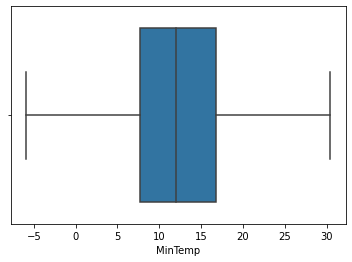

In [32]:
sns.boxplot(data['MinTemp'])
plt.show()

MinTemp


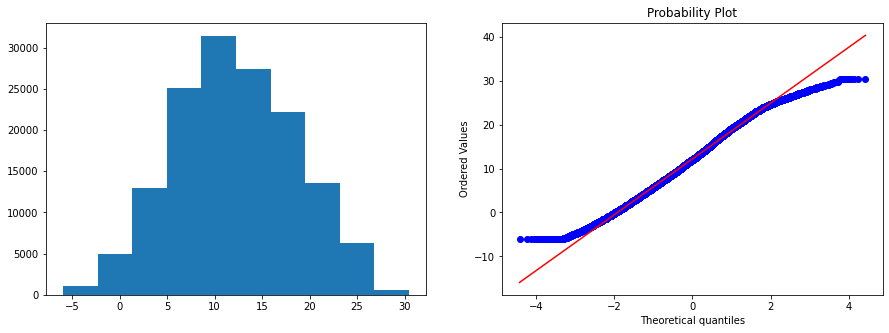

MaxTemp


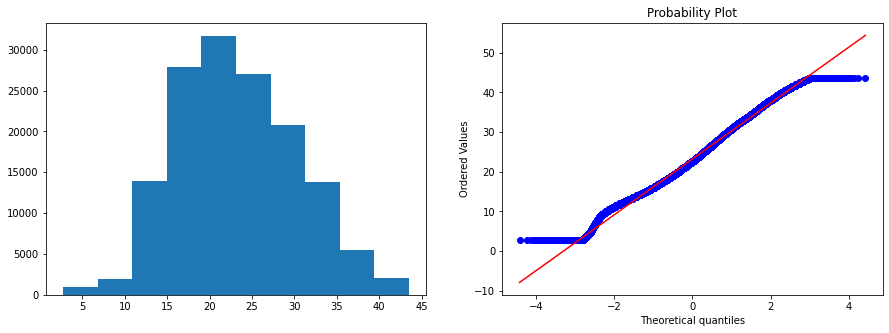

Rainfall


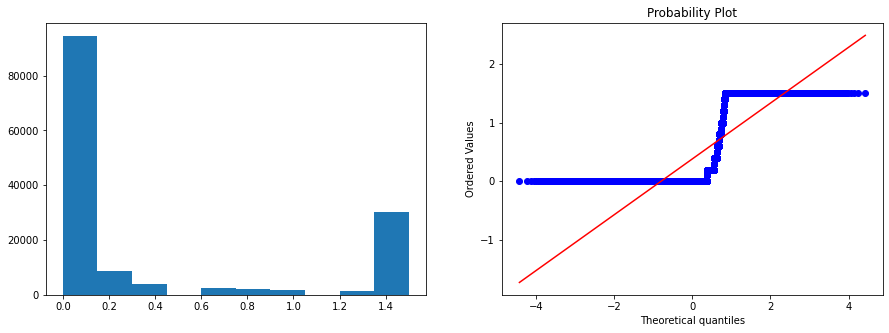

Evaporation


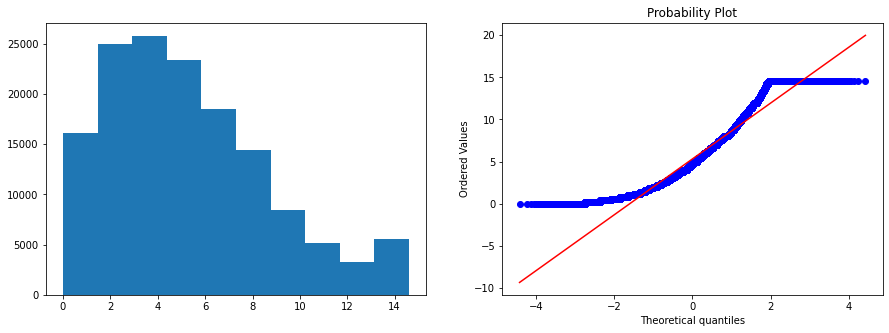

Sunshine


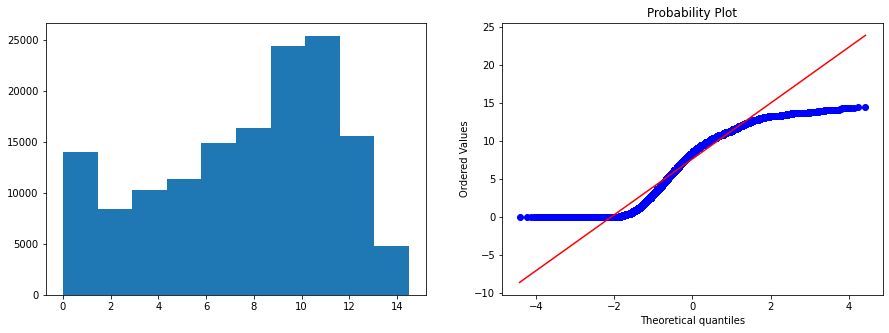

WindGustSpeed


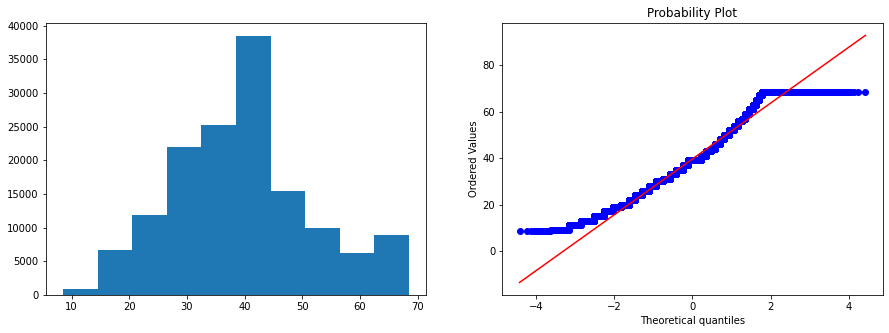

WindSpeed9am


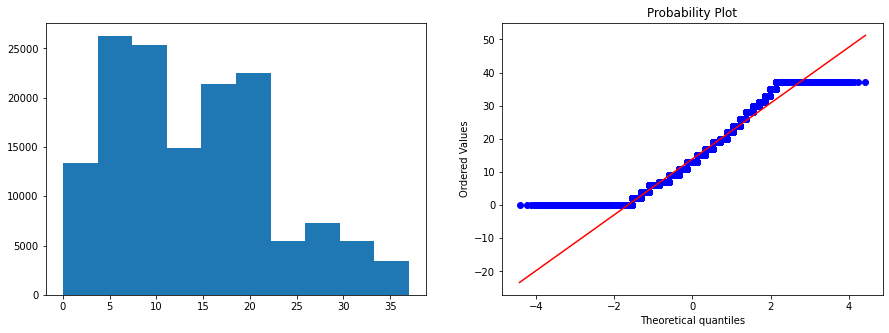

WindSpeed3pm


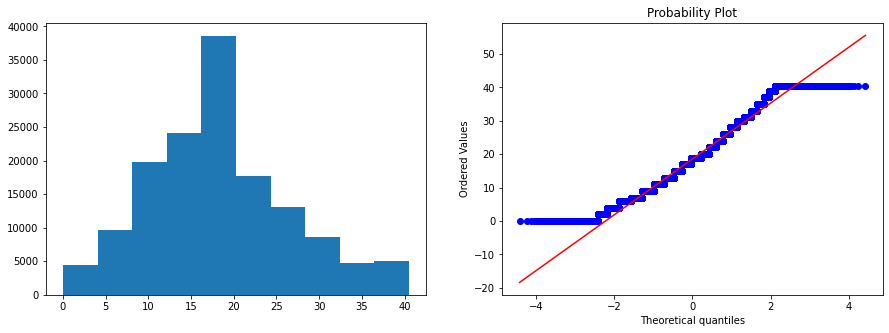

Humidity9am


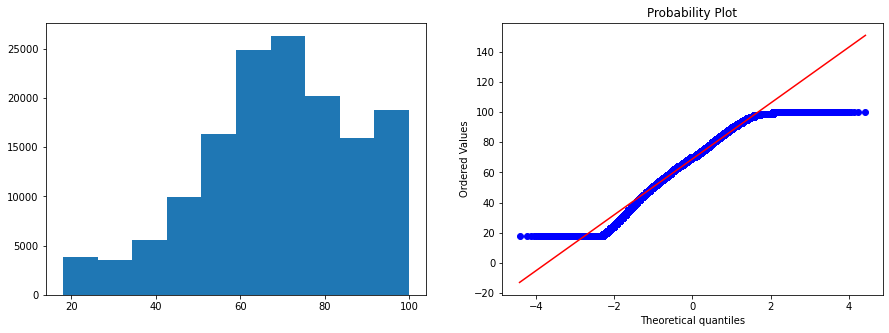

Humidity3pm


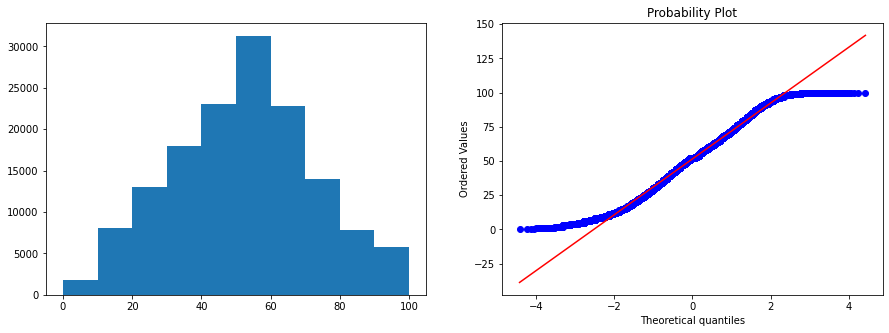

Pressure9am


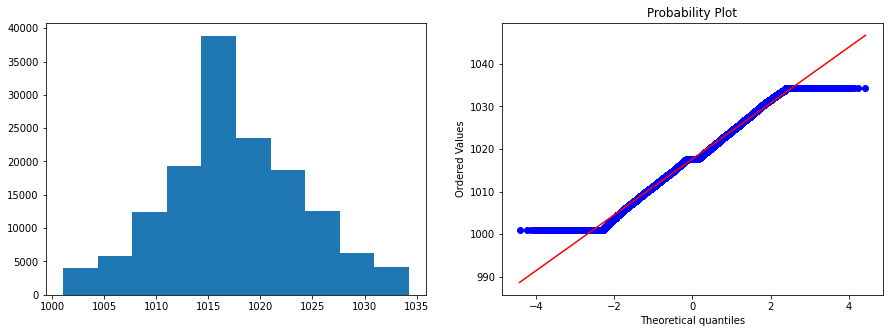

Pressure3pm


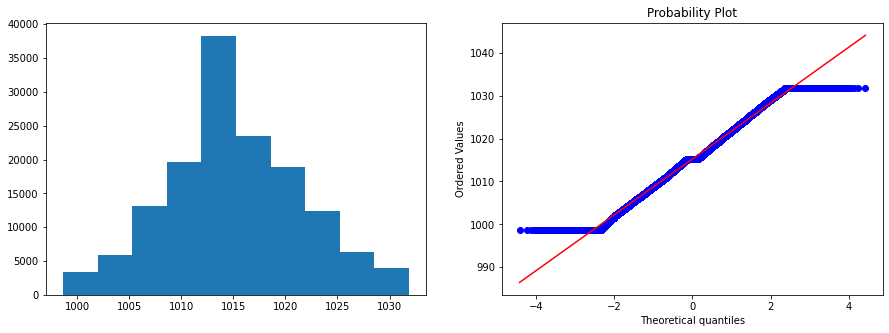

Temp9am


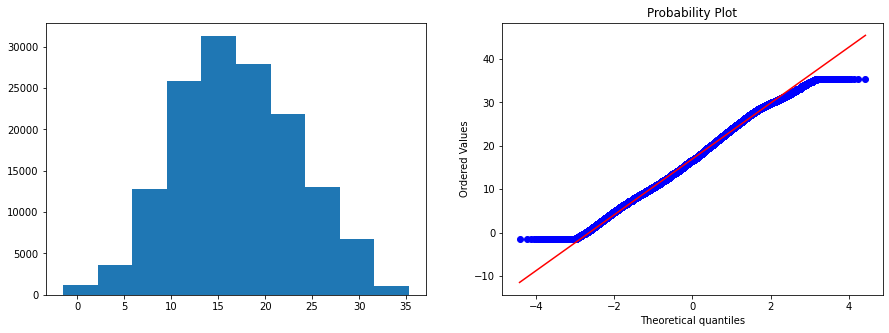

Temp3pm


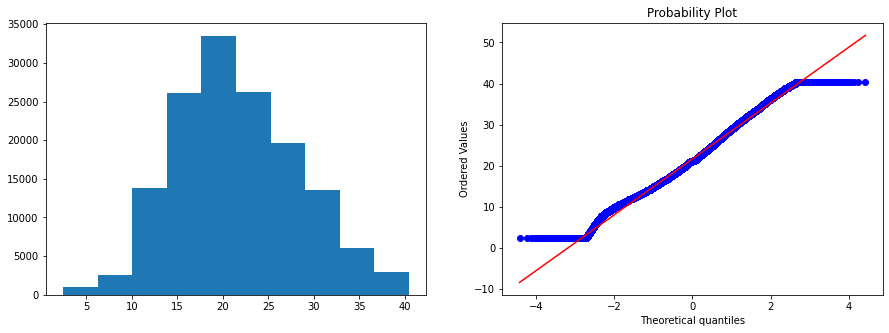

In [33]:
import scipy.stats as stats
for features in continuous_features:
    print(features)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(data[features])
    plt.subplot(1,2,2)
    stats.probplot(data[features],dist = 'norm',plot = plt)
    plt.show()


In [34]:
data.to_csv('datapreprocessing',index=False)

In [35]:
X = data.drop('RainTomorrow', axis = 1)
Y = data['RainTomorrow']
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,30,13.4,22.9,0.6,2.4,8.3,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,12,3
3,30,9.2,28.0,0.0,14.6,8.9,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,12,5


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2)

In [37]:
Y.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [38]:
y_train.value_counts()*100/len(y_train)

0    77.988794
1    22.011206
Name: RainTomorrow, dtype: float64

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm =SMOTE(random_state = 0)
x_train_res,y_train_res = sm.fit_resample(x_train,y_train)
print('The no of classes before fit are {}'.format(Counter(y_train)))
print('The no of classes after fit are {}'.format(Counter(y_train_res)))


The no of classes before fit are Counter({0: 90754, 1: 25614})
The no of classes after fit are Counter({0: 90754, 1: 90754})


In [40]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000,eval_metric='AUC')
cat.fit(x_train_res,y_train_res)

Learning rate set to 0.050285
0:	total: 136ms	remaining: 4m 31s
1:	total: 220ms	remaining: 3m 40s
2:	total: 290ms	remaining: 3m 12s
3:	total: 368ms	remaining: 3m 3s
4:	total: 449ms	remaining: 2m 59s
5:	total: 523ms	remaining: 2m 53s
6:	total: 609ms	remaining: 2m 53s
7:	total: 684ms	remaining: 2m 50s
8:	total: 760ms	remaining: 2m 48s
9:	total: 822ms	remaining: 2m 43s
10:	total: 909ms	remaining: 2m 44s
11:	total: 980ms	remaining: 2m 42s
12:	total: 1.05s	remaining: 2m 40s
13:	total: 1.12s	remaining: 2m 39s
14:	total: 1.24s	remaining: 2m 43s
15:	total: 1.32s	remaining: 2m 43s
16:	total: 1.4s	remaining: 2m 43s
17:	total: 1.48s	remaining: 2m 42s
18:	total: 1.56s	remaining: 2m 42s
19:	total: 1.64s	remaining: 2m 42s
20:	total: 1.72s	remaining: 2m 41s
21:	total: 1.82s	remaining: 2m 44s
22:	total: 1.9s	remaining: 2m 43s
23:	total: 1.99s	remaining: 2m 43s
24:	total: 2.07s	remaining: 2m 43s
25:	total: 2.16s	remaining: 2m 43s
26:	total: 2.24s	remaining: 2m 43s
27:	total: 2.33s	remaining: 2m 43s
28:

In [41]:
y_pred = cat.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred))
print('Accuracy Score is ',accuracy_score(y_test,y_pred))
print('Classification Report \n',classification_report(y_test,y_pred))

Confusion Matrix
 [[21618  1211]
 [ 2762  3501]]
Accuracy Score is  0.8634332462532655
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     22829
           1       0.74      0.56      0.64      6263

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092



0.7529753610322235

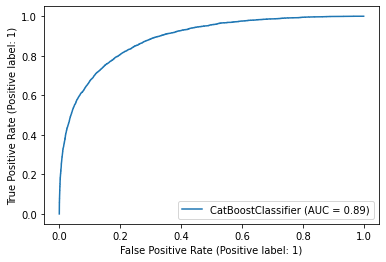

In [42]:
from sklearn import metrics
metrics.plot_roc_curve(cat,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred,average=None)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [44]:
y_pred_rfc = rfc.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred_rfc))
print('Accuracy Score is ',accuracy_score(y_test,y_pred_rfc))
print('Classification Report \n',classification_report(y_test,y_pred_rfc))

Confusion Matrix
 [[20699  2130]
 [ 2428  3835]]
Accuracy Score is  0.8433246253265503
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     22829
           1       0.64      0.61      0.63      6263

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.76     29092
weighted avg       0.84      0.84      0.84     29092



0.7595119913075874

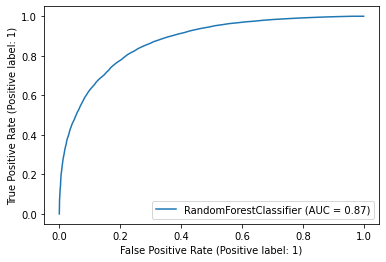

In [45]:
metrics.plot_roc_curve(rfc,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred_rfc)

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_res,y_train_res)

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred_logreg = logreg.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred_logreg))
print('Accuracy Score is ',accuracy_score(y_test,y_pred_logreg))
print('Classification Report \n',classification_report(y_test,y_pred_logreg))

Confusion Matrix
 [[17777  5052]
 [ 1603  4660]]
Accuracy Score is  0.7712429533892479
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.78      0.84     22829
           1       0.48      0.74      0.58      6263

    accuracy                           0.77     29092
   macro avg       0.70      0.76      0.71     29092
weighted avg       0.82      0.77      0.79     29092



0.7613774492775733

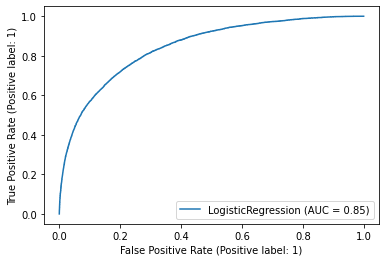

In [48]:
metrics.plot_roc_curve(logreg,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred_logreg)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import cross_val_score
accuracy_rate =[]
for i in (1,40):
    knnc = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,x_train_res,y_train_res,cv=10)
    accuracy_rate.append(score.mean())
plt.plot(range(1,40),accuracy_rate)


In [58]:
y_pred_knn = knn.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred_knn))
print('Accuracy Score is ',accuracy_score(y_test,y_pred_knn))
print('Classification Report \n',classification_report(y_test,y_pred_knn))

Confusion Matrix
 [[17497  5332]
 [ 1797  4466]]
Accuracy Score is  0.7549498143819606
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83     22829
           1       0.46      0.71      0.56      6263

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.69     29092
weighted avg       0.81      0.75      0.77     29092



0.7397571131681654

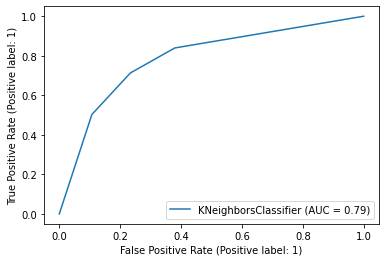

In [59]:
metrics.plot_roc_curve(knn,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred_knn)

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res,y_train_res)

GaussianNB()

In [62]:
y_pred_gnb = gnb.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred_gnb))
print('Accuracy Score is ',accuracy_score(y_test,y_pred_gnb))
print('Classification Report \n',classification_report(y_test,y_pred_gnb))

Confusion Matrix
 [[17267  5562]
 [ 1711  4552]]
Accuracy Score is  0.75
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83     22829
           1       0.45      0.73      0.56      6263

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.69     29092
weighted avg       0.81      0.75      0.77     29092



0.741585380108791

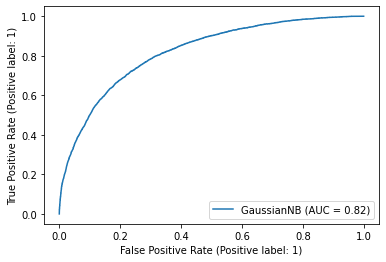

In [63]:
metrics.plot_roc_curve(gnb,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred_gnb)

In [66]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_res,y_train_res)

SVC()

In [67]:
y_pred_svm = svm.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred_svm))
print('Accuracy Score is ',accuracy_score(y_test,y_pred_svm))
print('Classification Report \n',classification_report(y_test,y_pred_svm))

Confusion Matrix
 [[18014  4815]
 [ 1605  4658]]
Accuracy Score is  0.7793207754709198
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     22829
           1       0.49      0.74      0.59      6263

    accuracy                           0.78     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



0.7664085475175846

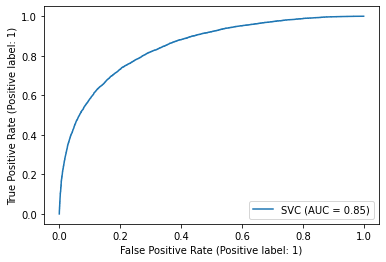

In [68]:
metrics.plot_roc_curve(svm,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred_svm)

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_res,y_train_res)

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred_xgb = xgb.predict(x_test)
print('Confusion Matrix\n' ,confusion_matrix(y_test,y_pred_xgb))
print('Accuracy Score is ',accuracy_score(y_test,y_pred_xgb))
print('Classification Report \n',classification_report(y_test,y_pred_xgb))

Confusion Matrix
 [[21511  1318]
 [ 2795  3468]]
Accuracy Score is  0.8586209267152481
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     22829
           1       0.72      0.55      0.63      6263

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



0.7479973303869972

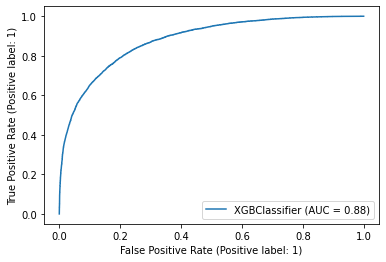

In [72]:
metrics.plot_roc_curve(xgb,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred_xgb)

In [74]:
import joblib
import pickle
joblib.dump(rfc, "rfc.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svm, "svm.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']